# Тема “Обучение без учителя”

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [13]:
data = load_boston()
data.keys()

feature_names = data.feature_names
target = data.target

X = pd.DataFrame(data.data, columns=feature_names)
y = pd.DataFrame(target, columns=['target'])

X['price'] = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_train_scaled.shape

(404, 14)

In [54]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [55]:
X_train_tsne.shape

(404, 2)

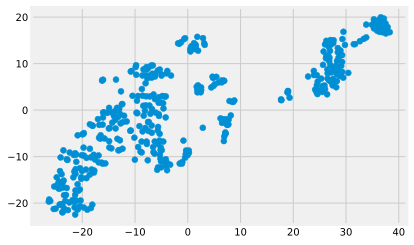

In [56]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random staterandom_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [57]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42) 

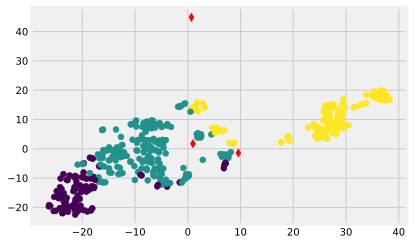

In [58]:
labels_train = kmeans.fit_predict(X_train_scaled)
centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.scatter(centers[:, 0], centers[:, 1], marker='d', c='r')

plt.show()

In [59]:
print('price')
print('Кластер 0: {}'.format(y_train.loc[labels_train == 0, 'target'].mean()))
print('Кластер 1: {}'.format(y_train.loc[labels_train == 1, 'target'].mean()))
print('Кластер 2: {}'.format(y_train.loc[labels_train == 2, 'target'].mean()))

price
Кластер 0: 28.730434782608683
Кластер 1: 24.432608695652174
Кластер 2: 16.179687500000004


In [60]:
print('CRIM')
print('Кластер 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

CRIM
Кластер 0: 0.0819683695652174
Кластер 1: 0.42933271739130424
Кластер 2: 10.715219062500003


### Задание 3*
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

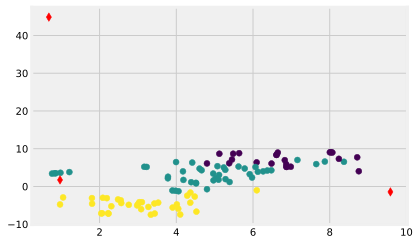

In [61]:
labels_test = kmeans.predict(X_test_scaled)

centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.scatter(centers[:, 0], centers[:, 1], marker='d', c='r')

plt.show()

In [63]:
print('price')
print('Кластер 0: {}'.format(y_test.loc[labels_test == 0, 'target'].mean()))
print('Кластер 1: {}'.format(y_test.loc[labels_test == 1, 'target'].mean()))
print('Кластер 2: {}'.format(y_test.loc[labels_test == 2, 'target'].mean()))

price
Кластер 0: 29.904545454545453
Кластер 1: 21.302222222222227
Кластер 2: 16.437142857142856


In [64]:
print('CRIM')
print('Кластер 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

CRIM
Кластер 0: 0.0942290909090909
Кластер 1: 0.2775542222222222
Кластер 2: 10.165531142857143
